In [1]:
!pip3 install -q torch==2.0.1 torchvision torchaudio

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1591d039-b04e-3207-32f4-efd66149aa50)


# 01. PyTorch Workflow Fundamentals

PyTorch Workflow covers the main outline of steps:

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

Specifically, we're going to cover:

| Topic | Contents |
| ----- | -------- |
| 1. Getting data ready | Data can be almost anything but to get started we're going to create a simple straght line. |
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and buld a training loop. |
| 3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data. |
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare it's findings to the actual (testing) data. |
| 5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| 6. Putting it all together | Let's take all of the above and combine it. |

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [3]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create a data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data into training and test sets

One of the most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ------- | -------------------- | --------------------- |
| Training set | The model learns from this data (like the course material you study during the semester). | ~60-80% | Always |
| Validation set | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| Testing set | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |


In [ ]:
# Create train/test split
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% for testing

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualise data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """Plots trainig data, test data and compares predictions."""

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # SHow the legend
    plt.legend(prop={"size": 14})

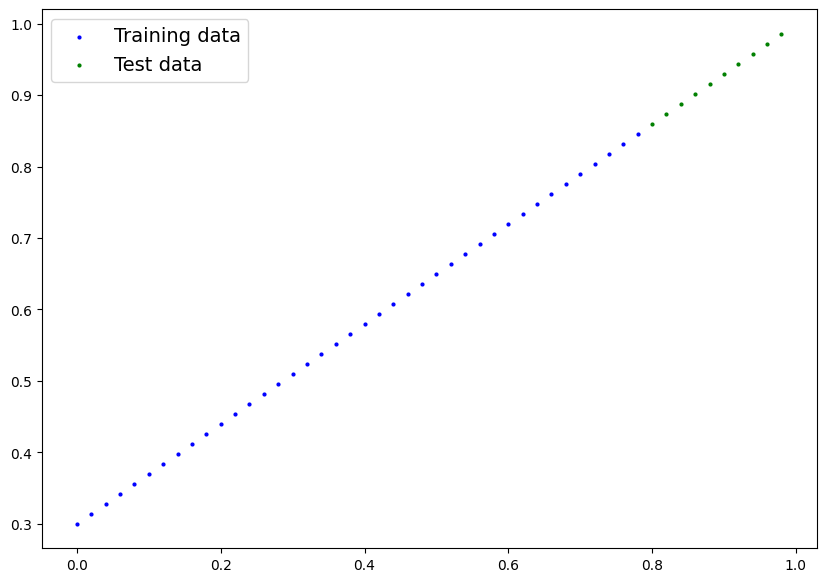

In [ ]:
plot_predictions()

## 2. Build model

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),  # <- PyTorch loves float32 by default
                                    requires_grad=True)  # <- can we update this value with gradient descent? (True or False)

        self.bias = nn.Parameter(torch.randn(1,  # <- start with random bias (this will get adjusted as teh model learns)
                                             dtype=torch.float),
                                 requires_grad=True)

    # Forward define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- 'x' is the input data e.g. training/testing features)
        return self.weights * x + self.bias  # <- this is the linear regression formula (y = m * x + b)

### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine:

| PyTorch module | What does it do? |
| -------------- | ---------------- |
| `torch.nn` | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| `torch.nn.Parameter` | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd". |
| `torch.nn.Module` | The base class for all neural network modules, all the building block for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| `torch.optim` | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. linear regression formula above). |

### Checking the contents of a PyTorch model

In [ ]:
# Set manual seed since nn.Parameters are randomly initialized
torch.manual_seed(42)  # 17

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Makin predictions using `torch.inference_mode()`

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predited values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predited values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


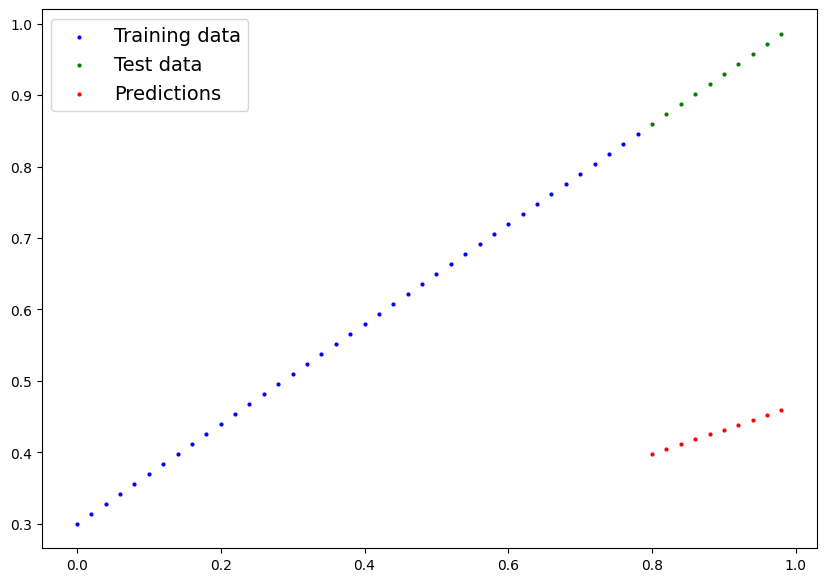

In [ ]:
# Plot predictions result
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. Train model

#### Creating a loss function and optimizer in PyTorch

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| -------- | ---------------- | ------------------------------ | ------------- |
| loss function | Measure how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in `torch.nn`. | Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`). |
| Optimizer | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in `torch.optim`. | Stochastic gradient descent (`torch.optim.SGD()`). Adam optimizer (`torch.optim.Adam()`). |

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),  # parameters of target model to optimize
                            lr=0.01)  # learning rate (how much the optimizer should change parameters at each step,
                                      # higher=more (less stable), lower=less (might take a long time))

### Creating an optimization loop in PyTorch

#### PyTorch training loop

For the training loop, we'll build the following steps:

| Number | Step name | What does id do? | Code example |
| ------ | --------- | ---------------- | ------------ |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(X_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_red, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence *backwards*. | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

#### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ------ | --------- | ---------------- | ------------ |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(X_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calculate evaluation metrics (optional) | Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

#### Put all of the above together

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn (y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))  # predictions come in torch.float datatype,
                                                                  # so comparisons need to be done with tensors of the same type
    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

        print(f"Epoch: {epoch} | MAE Train Loss: {loss:.4f} | MAE Test Loss: {test_loss:.4f}")

Epoch: 0 | MAE Train Loss: 0.3129 | MAE Test Loss: 0.4811
Epoch: 10 | MAE Train Loss: 0.1977 | MAE Test Loss: 0.3464
Epoch: 20 | MAE Train Loss: 0.0891 | MAE Test Loss: 0.2173
Epoch: 30 | MAE Train Loss: 0.0531 | MAE Test Loss: 0.1446
Epoch: 40 | MAE Train Loss: 0.0454 | MAE Test Loss: 0.1136
Epoch: 50 | MAE Train Loss: 0.0417 | MAE Test Loss: 0.0992
Epoch: 60 | MAE Train Loss: 0.0382 | MAE Test Loss: 0.0889
Epoch: 70 | MAE Train Loss: 0.0348 | MAE Test Loss: 0.0806
Epoch: 80 | MAE Train Loss: 0.0313 | MAE Test Loss: 0.0723
Epoch: 90 | MAE Train Loss: 0.0279 | MAE Test Loss: 0.0647


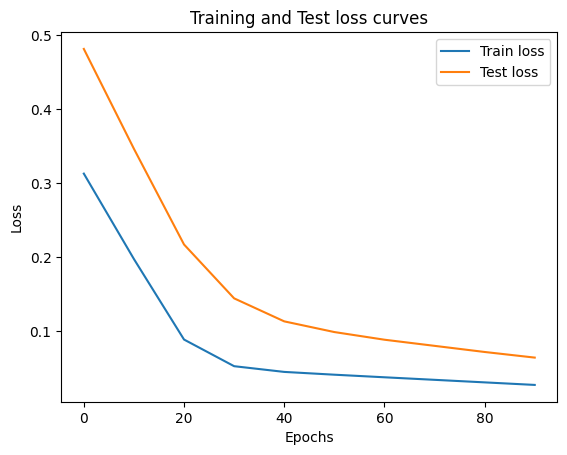

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")

plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### Exercise

In [ ]:
torch.manual_seed(42)

# Initialise new model object
model_0 = LinearRegressionModel()

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),  # parameters of target model to optimize
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Trainig

    # Put model in training mode
    model_0.train()

    # Forward pass on train data using model's forward() method
    y_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # Put Zero's to gradients of the optimizer for every epoch
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # Forward pass on test data
        test_pred = model_0(X_test)

        # Calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss:

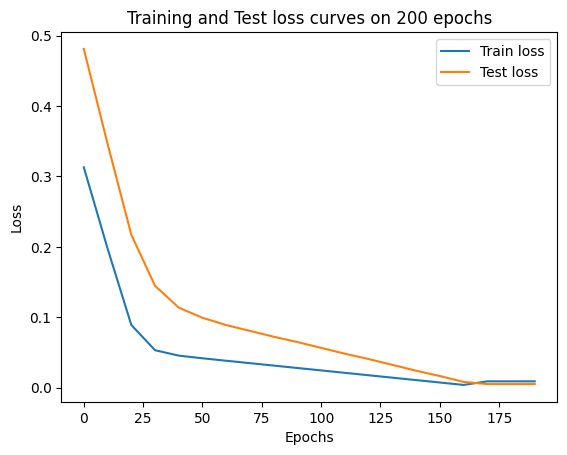

In [ ]:
# Plot the loss curves for the model that trained on 200 epochs
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")

plt.title("Training and Test loss curves on 200 epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# View on results of trainig on 200 epochs
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


#### Conclusion
In the result, that model learned pattern much better than with 100 epochs.

## 4. Making predictions with a trained PyTorch model (inference)

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:
1. Set the model in evaluation mode (`model.eval()`)
2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ....`).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    # 3. Make sure the calculations are done with the model and data on the same device
    # in our case, we haven't setup device-agnostic code yet so our data and model are
    # on the CPU by default.
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

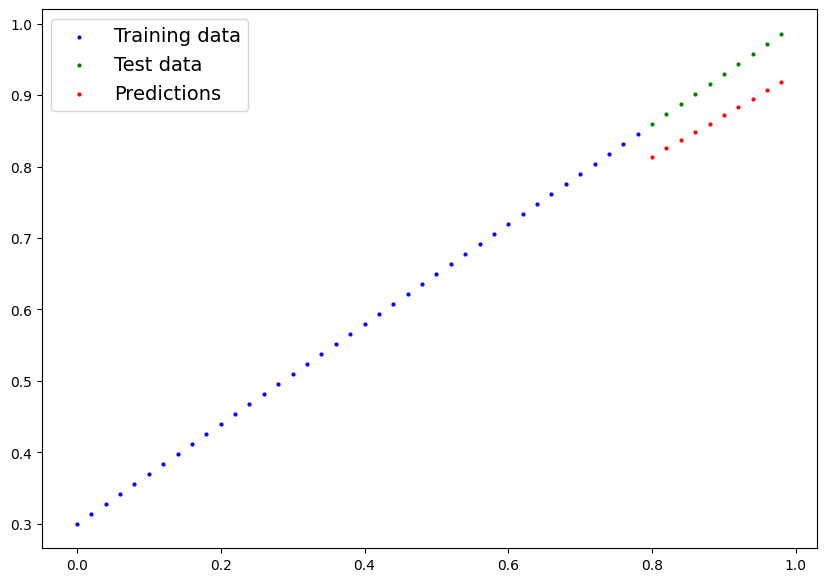

In [ ]:
# Plot our predictions results
plot_predictions(predictions=y_preds)

## 5. Saving and loading a PyTorch model

For saving and loading models in PyTorch, there are three main methods you should be aware of:

| PyTorch method | What does it do? |
| -------------- | ---------------- |
| `torch.save` | Save a serialized object to disk using Python's `pickle` utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`. |
| `torch.load` | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU, etc). |
| `torch.nn.Model.load_state_dict` | Loads model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

### Saving a PyTorch model's `state_dict()`

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),  # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Jul  1 06:59 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)  # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [ ]:
# Import necessary libraries
import torch
from torch import nn  # nn contains all of PyTorch's building block for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)  # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test  = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

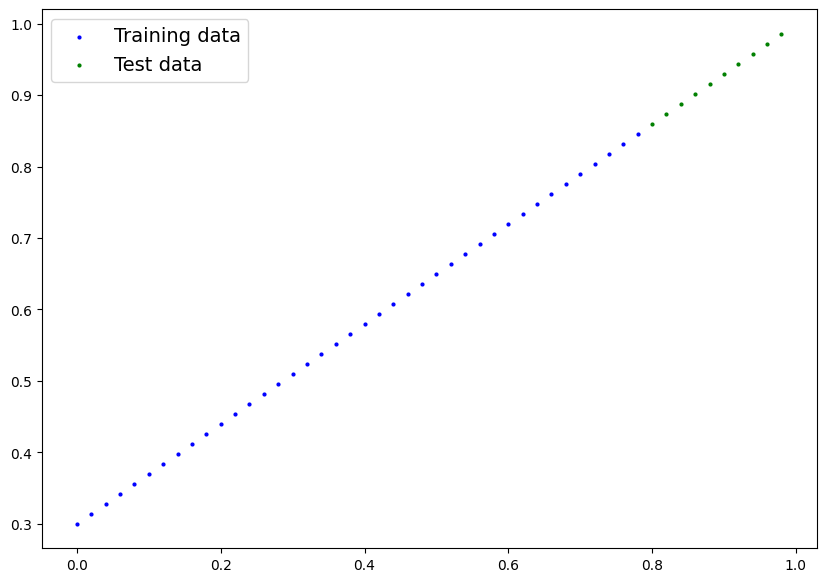

In [ ]:
# Note: If you're reset your runtime, this function won't work,
# you'll have to return the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Buildin a PyTorch linear model

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):

    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [ ]:
# Set the manual seed when creating the model (this isn't always need but is used
# for demonstrative purpose, try commenting it out and seeing what happens)
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device)  # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),  # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, erorr will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
for epoch in range(epochs):
    ### Training
    model_1.train()  # train mode is on by default after construction

    # 1. Forward pass
    y_preds = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_preds, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval()  # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_preds = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 100 | Train Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 200 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 300 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 400 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 500 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 600 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 700 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 800 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 900 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882


In [ ]:
# Find our model's learned parameters
from pprint import pprint
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### 6.4 Making predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

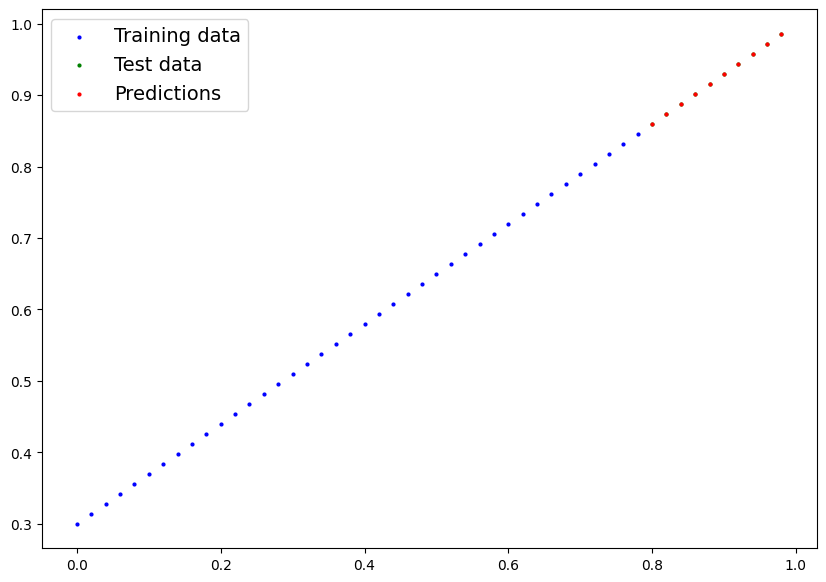

In [ ]:
# plot_predictions(predictions=y_preds)  # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),  # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises

In [16]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device - {device}")

Current device - cuda


### Exercise - 1

In [ ]:
# Set parameters for straight line dataset
weight = 0.3
bias = 0.9

In [ ]:
# Generate X data
start = 0
end = 1
step = 0.008
X_data = torch.arange(start, end, step).unsqueeze(dim=1)
# Create y data
y_data = weight * X_data + bias

len(X_data), len(y_data)

(125, 125)

In [ ]:
# Split data to train/test sets
split_size = int(0.8 * len(X_data))
X_train, y_train = X_data[:split_size], y_data[:split_size]
X_test, y_test = X_data[split_size:], y_data[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(100, 100, 25, 25)

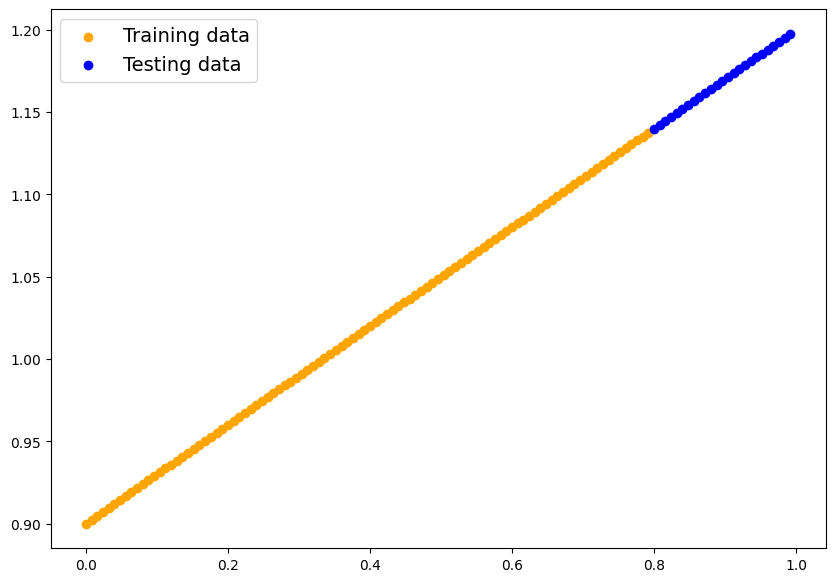

In [ ]:
# Plot training and testing data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='orange', label="Training data")
plt.scatter(X_test, y_test, c='blue', label="Testing data")
plt.legend(prop={"size": 14})

### Exercise - 2

In [10]:
class LinearModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                 requires_grad=True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """Data for training go through this method"""
        return self.weights * X + self.bias

In [ ]:
torch.manual_seed(21)

# Initialize model
ex_2_model = LinearModel().to(device)

# Check model parameters
ex_2_model, ex_2_model.state_dict()

(LinearModel(),
 OrderedDict([('weights', tensor([0.1081], device='cuda:0')),
              ('bias', tensor([-0.4376], device='cuda:0'))]))

In [ ]:
# Check on which device our model live
next(ex_2_model.parameters()).device

device(type='cuda', index=0)

### Exercise - 3

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

In [ ]:
# Create optimizer for model
learning_rate = 0.01
optimizer = torch.optim.SGD(ex_2_model.parameters(), learning_rate)

In [68]:
def train_part(model, data, labels):
    """Training part"""
    # Set training mode on model
    model.train()

    # Get predictions from model
    y_preds = model(data)

    # Calculate loss
    loss = loss_fn(y_preds, labels)

    # Set gradient in optimizer to zero
    optimizer.zero_grad()

    # Calculate loss to backward through model and change its parameters
    loss.backward()

    # Calculate optimizer gradient
    optimizer.step()
    return loss

In [69]:
def test_part(model, data, labels):
    """Test part"""
    # Set model to evaluation mode
    model.eval()

    # Forward pass data through model
    with torch.inference_mode():
        # Calculate evaluation predictions
        eval_preds = model(data)

        # Calculate the loss of evaluation data
        eval_loss = loss_fn(eval_preds, labels.type(torch.float))

    return eval_loss

In [ ]:
# Set the number of epochs
epochs = 300

# Set data to `cuda` device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Start train loop
for epoch in range(epochs):
    loss = train_part(ex_2_model, X_train, y_train)
    if epoch % 20 == 0:
        eval_loss = test_part(ex_2_model, X_test, y_test)
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {eval_loss:.4f}")

Epoch: 0 | Train Loss: 1.4136 | Test Loss: 1.4960
Epoch: 20 | Train Loss: 1.1822 | Test Loss: 1.2250
Epoch: 40 | Train Loss: 0.9508 | Test Loss: 0.9540
Epoch: 60 | Train Loss: 0.7195 | Test Loss: 0.6831
Epoch: 80 | Train Loss: 0.4881 | Test Loss: 0.4121
Epoch: 100 | Train Loss: 0.2567 | Test Loss: 0.1411
Epoch: 120 | Train Loss: 0.0653 | Test Loss: 0.0902
Epoch: 140 | Train Loss: 0.0507 | Test Loss: 0.1140
Epoch: 160 | Train Loss: 0.0438 | Test Loss: 0.1017
Epoch: 180 | Train Loss: 0.0370 | Test Loss: 0.0858
Epoch: 200 | Train Loss: 0.0301 | Test Loss: 0.0700
Epoch: 220 | Train Loss: 0.0233 | Test Loss: 0.0538
Epoch: 240 | Train Loss: 0.0164 | Test Loss: 0.0377
Epoch: 260 | Train Loss: 0.0096 | Test Loss: 0.0215
Epoch: 280 | Train Loss: 0.0027 | Test Loss: 0.0057


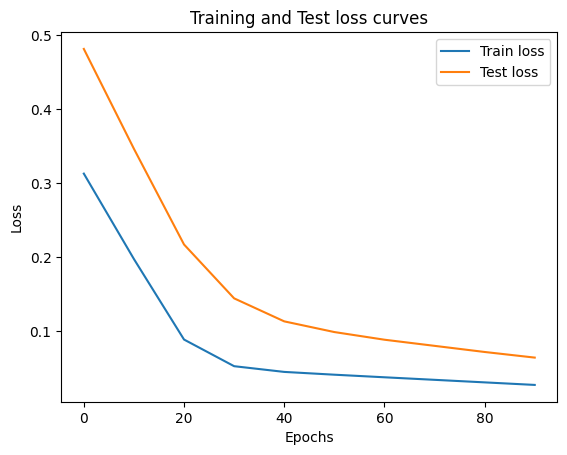

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")

plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Exercise - 4

In [ ]:
# Make predictions from model
ex_2_model.eval()

with torch.inference_mode():
    model_preds = ex_2_model(X_test)
model_preds.device

device(type='cuda', index=0)

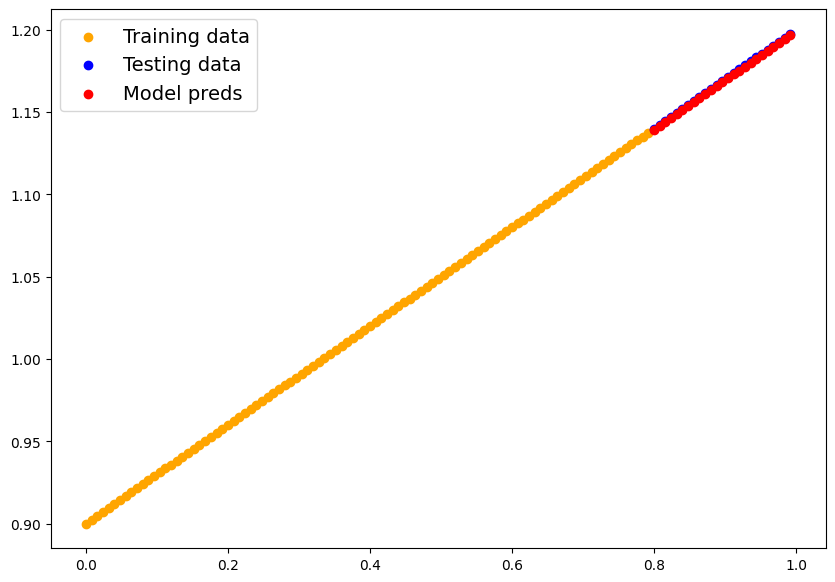

In [ ]:
# Plot results of model predictions with train/test data
X_train = X_train.cpu()
y_train = y_train.cpu()
X_test = X_test.cpu()
y_test = y_test.cpu()

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='orange', label="Training data")
plt.scatter(X_test, y_test, c='blue', label="Testing data")
plt.scatter(X_test, model_preds.cpu(), c='red', label="Model preds")
plt.legend(prop={"size": 14})

In [ ]:
# Check model state_dict
print("The model learned the following values for weights and bias:")
print(ex_2_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3027], device='cuda:0')), ('bias', tensor([0.8968], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


### Exercise - 5

In [ ]:
from pathlib import Path
# Save model to file
model_root = Path("models")
model_root.mkdir(parents=True, exist_ok=True)
model_name = "ex_2_model.pth"
model_path = model_root / model_name
print(f"Saving model to: {model_path}")
torch.save(ex_2_model.state_dict(),
           model_path)

Saving model to: models/ex_2_model.pth


In [ ]:
# Init new model and load state dict from file
loaded_ex_2_model = LinearModel().to(device)
loaded_ex_2_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
# Check loaded model
print(f"Loaded model:\n{loaded_ex_2_model}")
print(f"Model on device:\n{next(loaded_ex_2_model.parameters()).device}")

Loaded model:
LinearModel()
Model on device:
cuda:0


In [ ]:
# Check loaded model parameter with previous model
X_test = X_test.to(device)
loaded_ex_2_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_ex_2_model(X_test)
model_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Extra-curriculum

### How to adjuct learning rate

In [6]:
# Set parameters for straight line dataset
weights = 0.3
bias = 0.9

# Generate X data
start = 0
end = 1
step = 0.008
X_data = torch.arange(start, end, step).unsqueeze(dim=1)
# Create y data
y_data = weights * X_data + bias

len(X_data), len(y_data)

(125, 125)

In [7]:
# Split data to train/test sets
split_size = int(0.8 * len(X_data))
X_train, y_train = X_data[:split_size], y_data[:split_size]
X_test, y_test = X_data[split_size:], y_data[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(100, 100, 25, 25)

In [85]:
torch.manual_seed(21)

# Initialize extra curriculum model
ex_cur_model = LinearModel().to(device)

# Check model parameters
ex_cur_model, ex_cur_model.state_dict()

(LinearModel(),
 OrderedDict([('weights', tensor([0.1081], device='cuda:0')),
              ('bias', tensor([-0.4376], device='cuda:0'))]))

In [86]:
# Create loss function
loss_fn = nn.L1Loss()

In [87]:
# Create optimizer
optimizer = torch.optim.SGD(ex_cur_model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=70)

In [88]:
epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Create empty loss lists to track values
train_loss_values = []
val_loss_values = []
epoch_count = []

# Loop through epochs
for epoch in range(epochs):
    # Loop through training process
    loss = train_part(ex_cur_model, X_train, y_train)
    # Loop through validation process
    val_loss = test_part(ex_cur_model, X_test, y_test)
    # Step learning rate scheduler for adjusting learning rate
    scheduler.step()

    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().cpu().numpy())
    val_loss_values.append(val_loss.detach().cpu().numpy())

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Valid Loss: {val_loss}")

Epoch: 0 | Train Loss: 4.843592643737793 | Valid Loss: 1.49595308303833
Epoch: 20 | Train Loss: 4.626077175140381 | Valid Loss: 1.2437585592269897
Epoch: 40 | Train Loss: 4.486348628997803 | Valid Loss: 1.084401249885559
Epoch: 60 | Train Loss: 4.446626663208008 | Valid Loss: 1.037906289100647
Epoch: 80 | Train Loss: 4.44359827041626 | Valid Loss: 1.0339316129684448
Epoch: 100 | Train Loss: 4.410567283630371 | Valid Loss: 0.9857000708580017
Epoch: 120 | Train Loss: 4.318729877471924 | Valid Loss: 0.849605917930603
Epoch: 140 | Train Loss: 4.179975509643555 | Valid Loss: 0.6451170444488525
Epoch: 160 | Train Loss: 4.0398173332214355 | Valid Loss: 0.44267538189888
Epoch: 180 | Train Loss: 3.947667360305786 | Valid Loss: 0.3128300607204437
Epoch: 200 | Train Loss: 3.916785717010498 | Valid Loss: 0.27146318554878235
Epoch: 220 | Train Loss: 3.9142961502075195 | Valid Loss: 0.26783114671707153
Epoch: 240 | Train Loss: 3.8859431743621826 | Valid Loss: 0.22277511656284332
Epoch: 260 | Train L

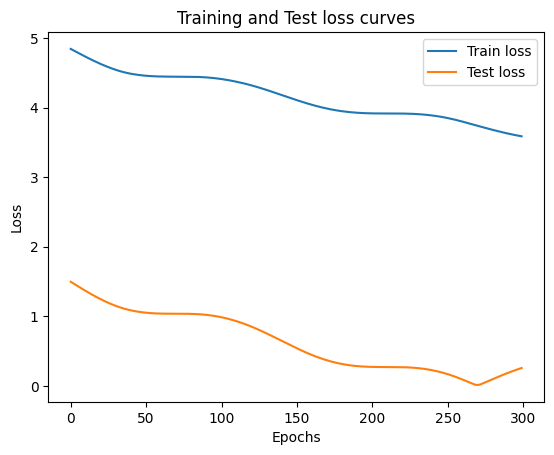

In [89]:
# Plot the result of learning
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, val_loss_values, label="Test loss")

plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [131]:
# Check learning rate of model
print(f"Learning rate after adjusting: {optimizer.param_groups[0]['lr']}")

Learning rate after adjusting: 0.008117449009293662


### What is `torch.nn` really?

#### MNIST data setup

In [91]:
from pathlib import Path
import requests

# Prepare dataset dir path
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
# Create dir for dataset
PATH.mkdir(parents=True, exist_ok=True)

# Define url and name of file f dataset
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

# Download dataset
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open('wb').write(content)

In [92]:
import pickle
import gzip

# Open and get train/valid sets from dataset
with gzip.open((PATH / FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

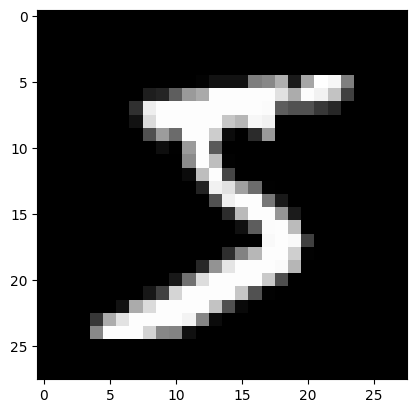

(50000, 784)


In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize one sample from dataset
plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")
plt.show()
print(x_train.shape)

In [94]:
import torch

# Convert numpy array type samples to torch.tensor type samples
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

# View on new samples
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


#### Neural net from scratch (without `torch.nn`)

In [95]:
import math

# Predefine parameters for model by hand
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [96]:
# Predefine activation function and model function
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [97]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # make predictions from model
preds[0], preds.shape

(tensor([-2.8377, -2.6261, -2.5367, -2.3239, -1.9326, -2.2457, -2.4553, -2.2351,
         -2.2166, -1.9687], grad_fn=<SelectBackward0>),
 torch.Size([64, 10]))

In [98]:
# Create loss function for the model
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [99]:
# Test loss function
yb = y_train[0:bs]
loss_func(preds, yb)

tensor(2.3921, grad_fn=<NegBackward0>)

In [100]:
# Create function to calculate accuracy of the model
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).type(torch.float).mean()

In [101]:
# Test accuracy function
accuracy(preds, yb)

tensor(0.0625)

In [102]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

# Go through train loop to fit the model
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #  set_trace()
        start_i = i * bs
        end_i =  start_i + bs
        xb = x_train[start_i : end_i]
        yb = y_train[start_i : end_i]

        preds = model(xb)
        loss = loss_func(preds, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [103]:
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0818, grad_fn=<NegBackward0>), tensor(1.))

#### Using `torch.nn.functional`

In [104]:
import torch.nn.functional as F

# Define new pre-built loss function
loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

In [105]:
# Test new loss function
loss_func(model(xb), yb), accuracy(model(xb), yb)

(tensor(0.0818, grad_fn=<NllLossBackward0>), tensor(1.))

#### Refactor using nn.Module

In [106]:
from torch import nn

# Create class of model with PyTorch.nn functionality
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [107]:
# Define new model object
model = Mnist_Logistic()

In [108]:
# Test new model object with new loss function
loss_func(model(xb), yb)

tensor(2.3189, grad_fn=<NllLossBackward0>)

In [109]:
def fit():
    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i : end_i]
            yb = y_train[start_i : end_i]

            preds = model(xb)
            loss = loss_func(preds, yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

In [110]:
# Train the model
fit()

In [111]:
# Test the model
loss_func(model(xb), yb)

tensor(0.0822, grad_fn=<NllLossBackward0>)

#### Refactor using `nn.Linear`

In [112]:
# Refactor model with nn.Linear layer from PyTorch functionality
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [113]:
# Define new object of the new class of linear model
model = Mnist_Logistic()
# Test new object of class
loss_func(model(xb), yb)

tensor(2.2981, grad_fn=<NllLossBackward0>)

In [114]:
# Train the model
fit()

In [115]:
# Test the trained model
loss_func(model(xb), yb)

tensor(0.0821, grad_fn=<NllLossBackward0>)

#### Refactor using `torch.optim`

In [116]:
from torch import optim

In [117]:
# Define function with new model object and optimization algorithm object
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

In [118]:
# Define new model object and optimization algorithm object
model, opt = get_model()
print(loss_func(model(xb), yb))

tensor(2.3094, grad_fn=<NllLossBackward0>)


In [119]:
# Go through train loop
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i : end_i]
        yb = y_train[start_i : end_i]

        preds = model(xb)
        loss = loss_func(preds, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [120]:
loss_func(model(xb), yb)

tensor(0.0809, grad_fn=<NllLossBackward0>)

#### Refactor using `Dataset`

In [121]:
from torch.utils.data import TensorDataset

In [122]:
train_ds = TensorDataset(x_train, y_train)

In [123]:
model, opt = get_model()

# Iterate through epochs and dataset
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]

        preds = model(xb)
        loss = loss_func(preds, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [124]:
loss_func(model(xb), yb)

tensor(0.0804, grad_fn=<NllLossBackward0>)

#### Refactor using `DataLoader`

In [125]:
from torch.utils.data import DataLoader

In [126]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

In [127]:
model, opt = get_model()

# Iterate through epochs and dataset loader
for epoch in range(epochs):
    for xb, yb in train_dl:
        preds = model(xb)
        loss = loss_func(preds, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [128]:
loss_func(model(xb), yb)

tensor(0.0817, grad_fn=<NllLossBackward0>)

#### Add validation

In [129]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [132]:
model, opt = get_model()

for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        preds = model(xb)
        loss = loss_func(preds, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.inference_mode():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.3217)
1 tensor(0.2957)


#### Create `fit()` and `get_data()`

In [133]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [134]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.inference_mode():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [135]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2)
    )

In [136]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3051440062880516
1 0.3117709219455719


#### Switch to CNN

In [137]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)

        return xb.view(-1, xb.size(1))

In [138]:
lr = 0.1
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.40933661313056946
1 0.26551061737537385


#### Using `nn.Sequential`

In [140]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [141]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.4089415601015091
1 0.22873847888708115


#### Wrapping `DataLoader`

In [142]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y

In [145]:
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))

In [146]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [147]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [148]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.5423405205011368
1 0.24111676715612412


#### Using GPU

In [149]:
# Check the GPU is working with PyTorch
torch.cuda.is_available()

True

In [150]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [151]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)

In [152]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [153]:
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [154]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.21742480201721193
1 0.1860385125875473
